In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [35]:
initials = [10, 100, 1000, 10000]
finals = [9, 99, 999, 9999]

json_files = {}
for j in finals:
    json_files[j] = {}
    for i in initials:
        test = "intial_{}_fanal_{}".format(i, j)
        path = test + "/base/estimates.json"
        with open("criterion/" + path, "r") as f:
            json_files[j][i] = json.load(f)

In [42]:
estimated = {}
for j in finals:
    estimated[j] = {}
    for i in initials:
        estimated[j][i] = json_files[j][i]["Slope"]['point_estimate']

In [49]:
df = pd.DataFrame(estimated)

In [71]:
df

,9,99,999,9999
10,35.820630,404.415189,2848.951695,27755.904737
100,35.620310,269.533286,3513.756927,27965.009375
1000,80.364602,320.280097,2722.730163,27262.152093
10000,81.917950,311.527211,2758.708878,27838.317146


In [64]:
df.columns

Int64Index([9, 99, 999, 9999], dtype='int64')

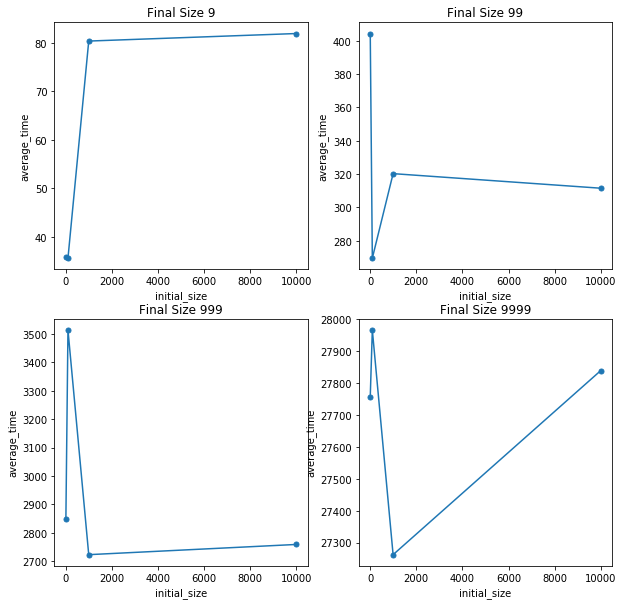

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
idx = 0
di = [0, 0, 1, 1]
dj = [0, 1, 0, 1]
for c in df.columns:
    axs[di[idx], dj[idx]].set_title("Final Size "+str(c))
    axs[di[idx], dj[idx]].set_xlabel("initial_size")
    axs[di[idx], dj[idx]].set_ylabel("average_time")
    axs[di[idx], dj[idx]].plot(df[c].index, df[c].values, marker='.', markersize=10)
    idx += 1